# Reconstruction network analysis
**Author:** Scott Campit

## Summary
This notebook constructs network representations of multiple -omics datasets and regulatory layers.

## Import libraries

In [1]:
# General Libraries
import re
import json

# Data Science Libraries
import matplotlib.pyplot as plt
import pandas
import numpy
import networkx as nx

# Constraint-based metabolic modeling toolboxes
import cobra
%matplotlib inline

## Import Network Reconstruction
The exercise below will use the epigenome-scale metabolic reconstruction as the metabolic network.

In [2]:
model_path = '/home/scampit/Data/Reconstructions/eGEM/07132020.mat'
model = cobra.io.load_matlab_model(model_path)

/home/scampit/PyEnvs/networks/lib/python3.8/site-packages/cobra/core/reaction.py:464: UserWarning: malformed gene_reaction_rule '(( 1737.1 ) and (( 1738.1 ) and ( 8050.1 )) and (( 5161.1 ) and ( 5162.1 ))) or ((( 5160.1 ) and ( 5162.1 )) and ( 1737.1 ) and (( 1738.1 ) and 8050.1 )))' for <Reaction PDHn at 0x7f85956c9c10>
  warn("malformed gene_reaction_rule '%s' for %s" % (new_rule, repr(self)))


First, we'll get some of the key identifiers

In [41]:
model.medium

{'EX_ala_L_e': 0.05,
 'EX_arg_L_e': 0.05,
 'EX_asn_L_e': 0.05,
 'EX_asp_L_e': 0.05,
 'EX_btn_e': 0.005,
 'EX_ca2_e': 1000.0,
 'EX_chol_e': 0.005,
 'EX_cl_e': 1000.0,
 'EX_cys_L_e': 0.05,
 'EX_fe2_e': 1000.0,
 'EX_fol_e': 0.005,
 'EX_glc_e': 5.0,
 'EX_gln_L_e': 0.5,
 'EX_glu_L_e': 0.05,
 'EX_gly_e': 0.05,
 'EX_gthrd_e': 0.05,
 'EX_his_L_e': 0.05,
 'EX_ile_L_e': 0.05,
 'EX_inost_e': 0.005,
 'EX_k_e': 1000.0,
 'EX_leu_L_e': 0.05,
 'EX_lys_L_e': 0.05,
 'EX_met_L_e': 0.05,
 'EX_na1_e': 1000.0,
 'EX_ncam_e': 0.005,
 'EX_o2_e': 1000.0,
 'EX_peplys_e': 100.0,
 'EX_phe_L_e': 0.05,
 'EX_pi_e': 1000.0,
 'EX_pnto_R_e': 0.005,
 'EX_pydx_e': 0.005,
 'EX_ribflv_e': 0.005,
 'EX_ser_L_e': 0.05,
 'EX_thm_e': 0.005,
 'EX_thr_L_e': 0.05,
 'EX_trp_L_e': 0.05,
 'EX_tyr_L_e': 0.05,
 'EX_val_L_e': 0.05}

In [5]:
recon1Graph = nx.DiGraph()
for rxn in model.reactions:
    
    rxnFormula = re.sub(r'\s*\d+\.\d+\s*', '', rxn.reaction)
    # Get reactions, productions, and network directionality
    if "-->" in rxnFormula:
        reactants, products = rxnFormula.split('-->')
        reactionType = 'IRREVERSIBLE'
    elif "<=>" in rxnFormula:
        reactants, products = rxnFormula.split('<=>')
        reactionType = 'REVERSIBLE'
    # Construct directed network by products
    for prod in products.split('+'):
        for react in reactants.split('+'):
            if reactionType == 'IRREVERSIBLE':
                #recon1Graph.add_edge(u_of_edge=react.strip(), v_of_edge=prod.strip(), 
                #                     color='blue', label=rxn.id)
                try:
                    recon1Graph.add_edge(u_of_edge=model.genes.get_by_id(rxn), 
                                         v_of_edge=react.strip(), 
                                         color='green', label=rxn.id)
                    recon1Graph.add_edge(u_of_edge=model.genes.get_by_id(rxn), 
                                         v_of_edge=prod.strip(), 
                                         color='green', label=rxn.id)
                except KeyError:
                    pass
                    
            elif reactionType == 'REVERSIBLE':
                #recon1Graph.add_edge(u_of_edge=react.strip(), v_of_edge=prod.strip(), 
                #                     color='blue', label=rxn.id)
                #recon1Graph.add_edge(u_of_edge=prod.strip(), v_of_edge=react.strip(), 
                #                     color='blue', label=rxn.id)
                try:
                    recon1Graph.add_edge(u_of_edge=model.genes.get_by_id(rxn), 
                                         v_of_edge=react.strip(), 
                                         color='green', label=rxn.id)
                    recon1Graph.add_edge(u_of_edge=model.genes.get_by_id(rxn), 
                                         v_of_edge=prod.strip(), 
                                         color='green', label=rxn.id)
                except KeyError:
                    pass
                

In [6]:
# Get reaction
rxn = model.reactions[3000]
print(rxn)

gpr = rxn.genes
print(gpr)
genes = model.genes.get_by_id(gpr)

PI3PP: h2o_c + pail3p_hs_c --> pail_hs_c + pi_c
frozenset({<Gene 8897.3 at 0x7f8595871490>, <Gene 8897.1 at 0x7f8595871a30>, <Gene 8897.2 at 0x7f8595871a60>})


KeyError: frozenset({<Gene 8897.3 at 0x7f8595871490>, <Gene 8897.1 at 0x7f8595871a30>, <Gene 8897.2 at 0x7f8595871a60>})

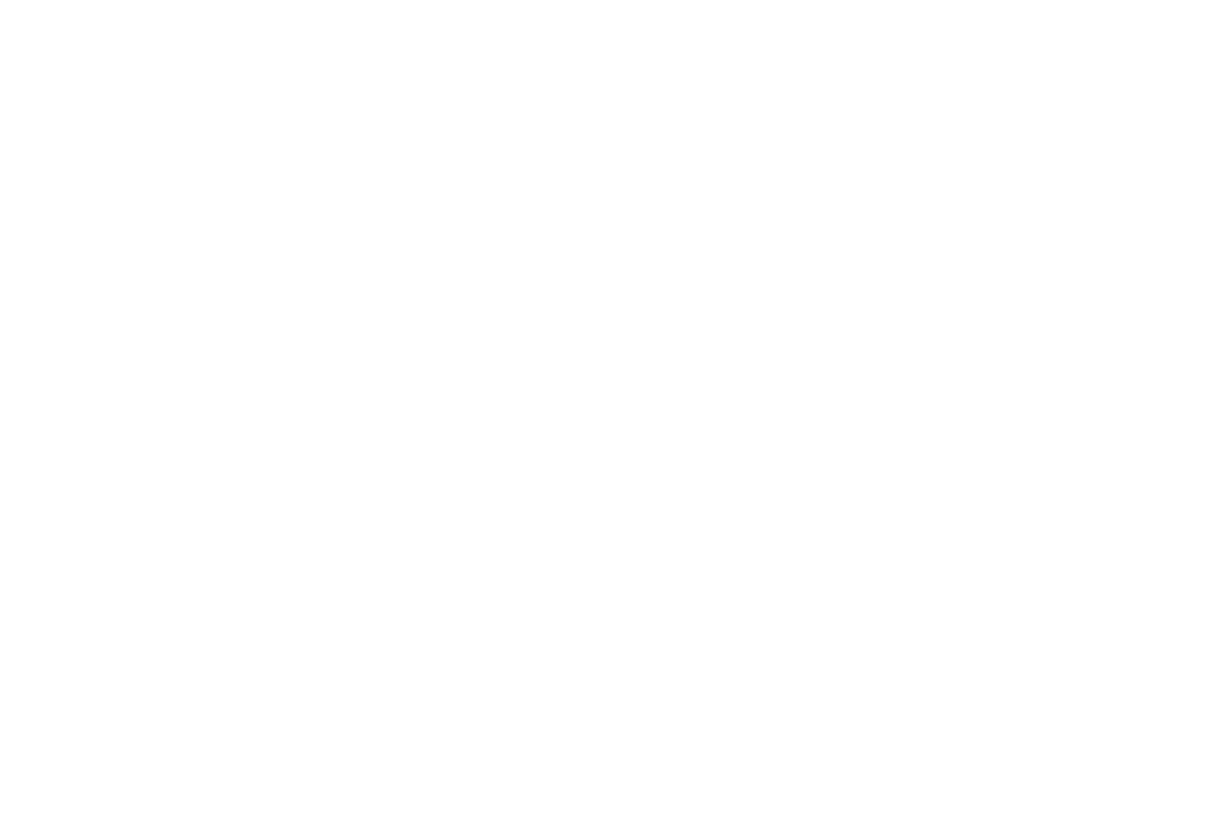

In [7]:
plt.figure(figsize=(12,8), dpi=100, facecolor='w', edgecolor='k')
nx.draw(recon1Graph, node_size=5, with_labels=False)
plt.show()